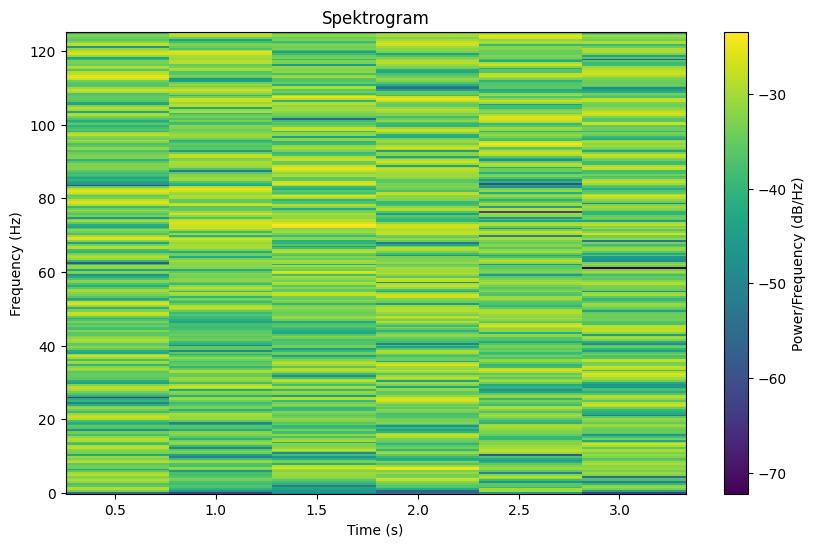

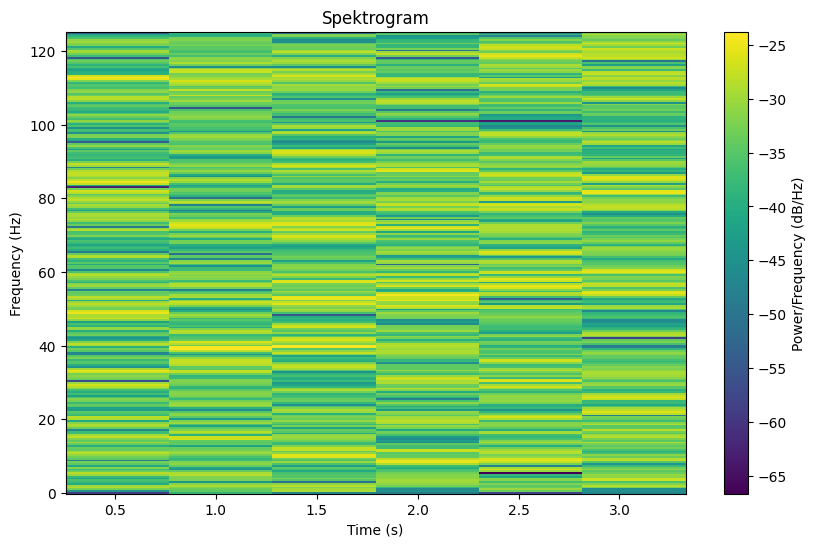

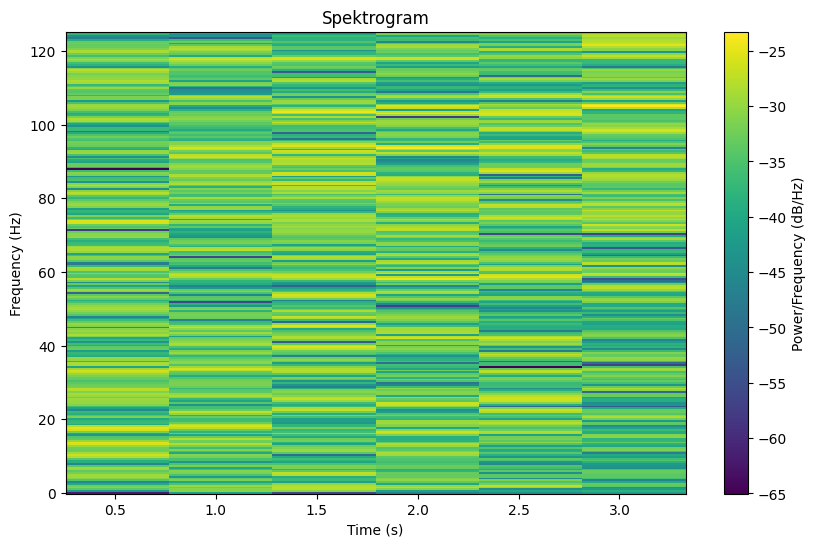

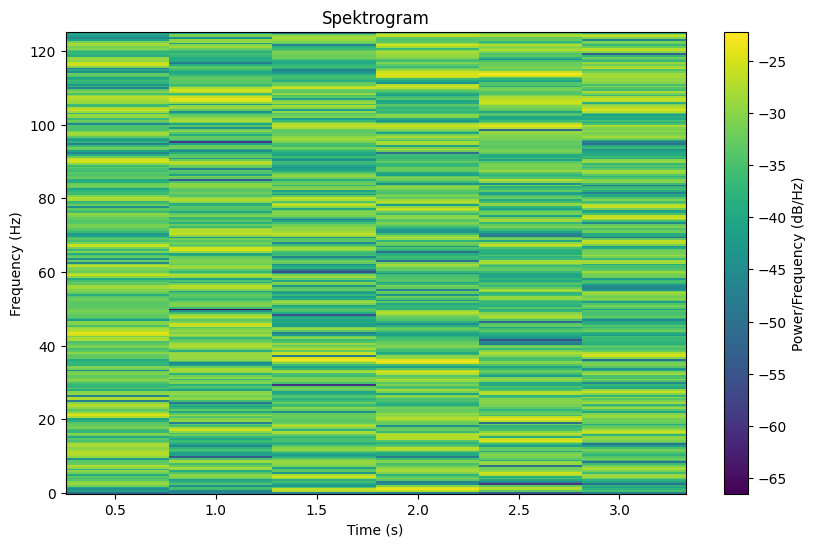

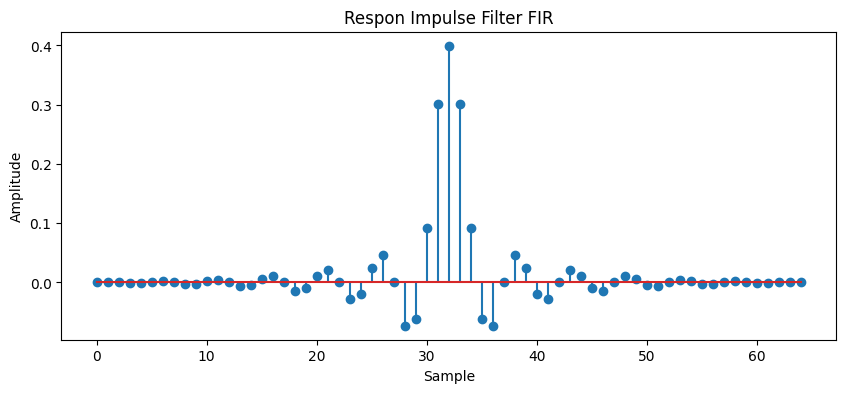

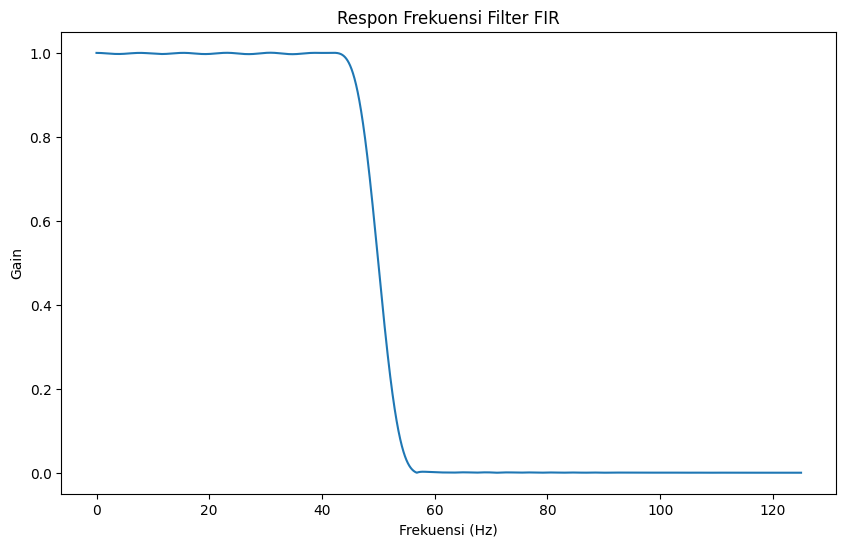

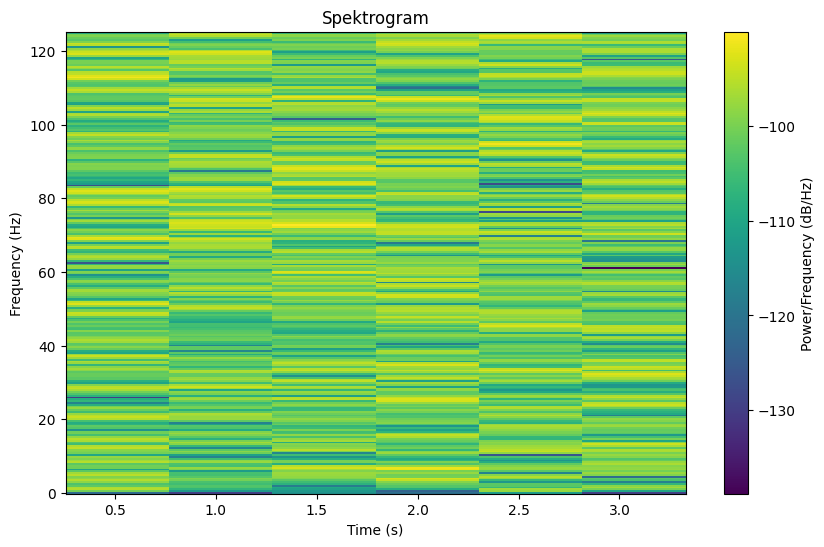

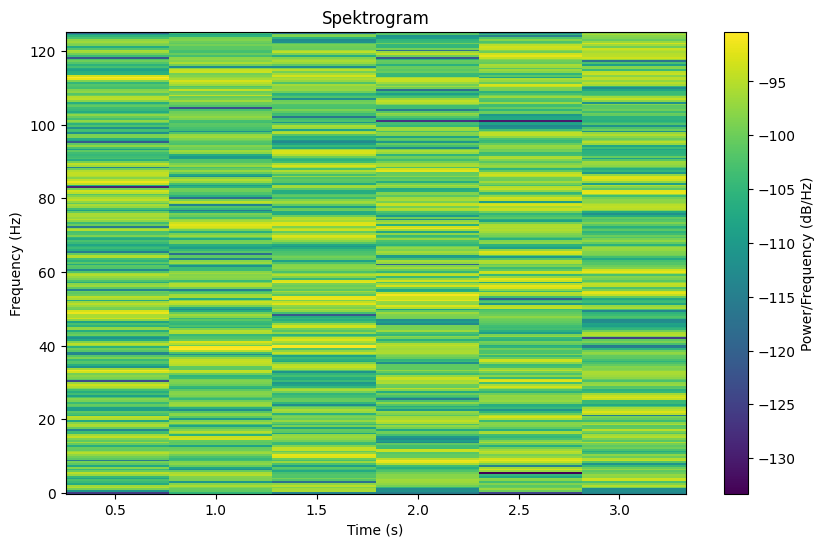

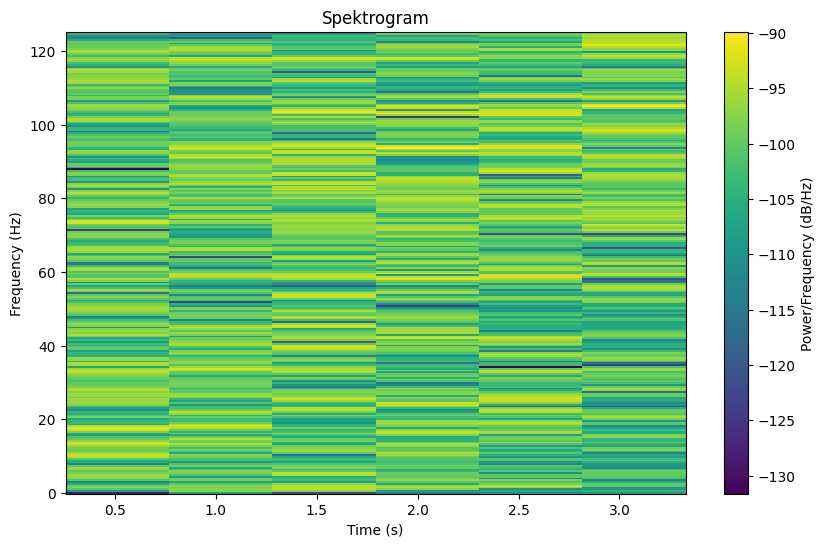

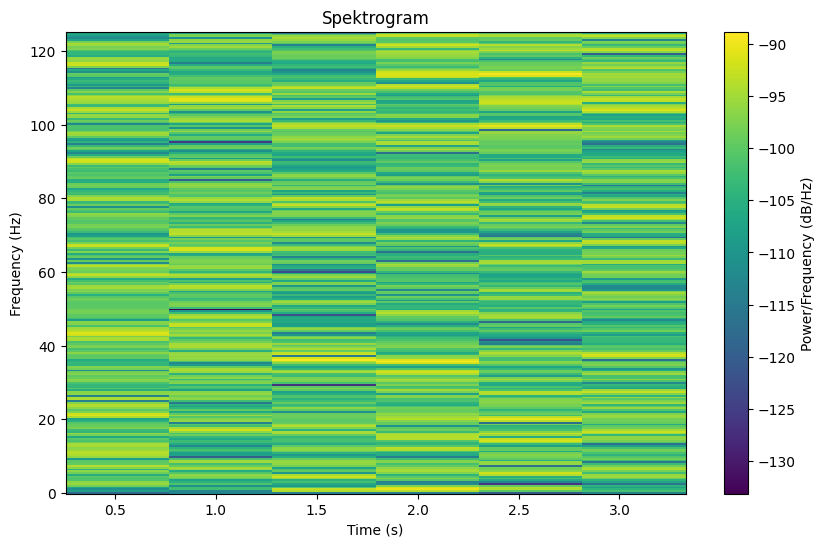

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Fungsi untuk memotong dataset dan membersihkan line noise
def potong_dataset(dataset, channels):
    # Potong dataset sesuai dengan kanal yang diinginkan
    potongan_data = dataset[:, channels, :]

    return potongan_data

# Fungsi untuk menganalisis spektrogram
def analisis_spektrogram(data, sfreq):
    f, t, Sxx = signal.spectrogram(data, sfreq, nperseg=256, noverlap=128, nfft=512)
    
    # Tampilkan spektrogram
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(t, f, 10 * np.log10(Sxx), shading='auto')
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title('Spektrogram')
    plt.show()

# Fungsi untuk mendesain filter FIR dengan metode window
def desain_filter_fir(sfreq, notch_freq, order):
    nyquist = 0.5 * sfreq
    freq = notch_freq / nyquist
    taps = signal.firwin(order + 1, freq, window='hamming')
    
    return taps

# Fungsi untuk menerapkan filter pada data
def aplikasikan_filter(data, taps):
    # Iterasi melalui semua potongan data dan terapkan filter FIR
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            data[i, j, :] = signal.lfilter(taps, 1.0, data[i, j, :])
    
    return data

# Contoh penggunaan
# Gantilah bagian ini dengan cara memuat atau menginisialisasi dataset sesuai dengan kebutuhan Anda
# Misalnya, Anda dapat menggunakan library seperti MNE atau mengupload file dataset EEG
# Sesuaikan channels dengan indeks kanal yang sesuai dengan dataset Anda
# Contoh dataset dan channels hanya bersifat ilustratif dan perlu disesuaikan dengan kebutuhan sebenarnya.
dataset = np.random.rand(1000, 4, 5000)  # Contoh dataset dengan dimensi (jumlah_data, jumlah_channel, panjang_sinyal)
channels = [0, 1, 2, 3]  # Indeks kanal AF3, AF4, O1, O2
sfreq = 250  # Frekuensi sampel (gantilah dengan frekuensi sampel dataset Anda)
notch_freq = 50  # Frekuensi noise yang ingin dihilangkan
order = 64  # Orde filter FIR (gantilah sesuai kebutuhan)

# Potong dataset
potongan_data = potong_dataset(dataset, channels)

# Analisis spektrogram sebelum filtering
for i in range(potongan_data.shape[1]):
    analisis_spektrogram(potongan_data[:, i, 0], sfreq)

# Desain filter FIR
taps = desain_filter_fir(sfreq, notch_freq, order)

# Tampilkan respon impulse dari filter
plt.figure(figsize=(10, 4))
plt.stem(taps)
plt.title('Respon Impulse Filter FIR')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

# Tampilkan respon frekuensi dari filter
w, h = signal.freqz(taps, 1.0, worN=8000)
plt.figure(figsize=(10, 6))
plt.plot(0.5 * sfreq * w / np.pi, np.abs(h))
plt.title('Respon Frekuensi Filter FIR')
plt.xlabel('Frekuensi (Hz)')
plt.ylabel('Gain')
plt.show()

# Aplikasikan filter FIR pada data
potongan_data_cleaned = aplikasikan_filter(potongan_data, taps)

# Analisis spektrogram setelah filtering
for i in range(potongan_data_cleaned.shape[1]):
    analisis_spektrogram(potongan_data_cleaned[:, i, 0], sfreq)